In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
df = pd.read_csv('Estadisticas-de-Produccion-de-Siembra-de-Plantas-DIGECAC-2017-2025-4.csv', sep=',' , encoding='latin1')

In [4]:
df.drop('Unnamed: 4' , axis=1, inplace=True)

In [5]:
df.dtypes

Tipo de Especie        object
Cantidad Producida    float64
Mes                    object
Año                     int64
dtype: object

In [6]:
df

,Tipo de Especie,Cantidad Producida,Mes,Año
0,Agave,100.0,Enero,2017
1,Cheflera,300.0,Enero,2017
2,Crotos,2500.0,Enero,2017
3,Iris Amarillas,790.0,Enero,2017
4,Palma Manila,200.0,Enero,2017
...,...,...,...,...
6102,Rosa,2.0,Junio,2025
6103,Tamarindo,190.0,Junio,2025
6104,Trinitaria,2712.0,Junio,2025
6105,Uva de Plya,5435.0,Junio,2025


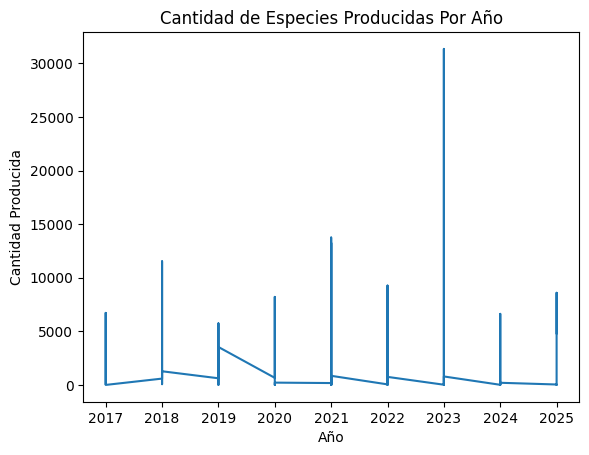

In [7]:
# Prueuba de Grafico
plt.plot(df['Año'] , df['Cantidad Producida'])
plt.title('Cantidad de Especies Producidas Por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Producida')
plt.show()

In [8]:
# Vamos a sumar la cantidad producida por año quiero algo que salga mas o menos asi

#2018 se produjo x cantidad de plantas
#2019 se produjo x cantidad de plantas

In [9]:
# Vamos A Verificar cuales años tenemos disponibles en nuestro dataset

print(df['Año'].unique())

# Verificar que tipo de datos es la columna año para ver como la vamos a manejar
print(df['Año'].dtype)

[2017 2018 2019 2020 2021 2022 2023 2024 2025]
int64


In [10]:
Años_Disponible = {
    2017,
    2018,
    2019,
    2020,
    2021,
    2022,
    2023,
    2024,
    2025
}

In [11]:
for Años_usados in Años_Disponible:
    Consulta = df.loc[df['Año'] == Años_usados, 'Cantidad Producida'].sum()
    print(f"En el Año {Años_usados} se Producieron un total de {int(Consulta):,} Especies de Plantas") 

En el Año 2017 se Producieron un total de 125,969 Especies de Plantas
En el Año 2018 se Producieron un total de 194,692 Especies de Plantas
En el Año 2019 se Producieron un total de 168,815 Especies de Plantas
En el Año 2020 se Producieron un total de 190,382 Especies de Plantas
En el Año 2021 se Producieron un total de 835,169 Especies de Plantas
En el Año 2022 se Producieron un total de 602,312 Especies de Plantas
En el Año 2023 se Producieron un total de 447,891 Especies de Plantas
En el Año 2024 se Producieron un total de 381,834 Especies de Plantas
En el Año 2025 se Producieron un total de 181,129 Especies de Plantas


In [12]:
# Vamos a sacar aqui el valor total y los años 

Datos_ParaExcel = []

In [13]:
for año in Años_Disponible:
    total = df.loc[df['Año'] == año , 'Cantidad Producida'].sum()
    Datos_ParaExcel.append({
        'Año': año,
        'Cantidad de Especies' : int(total)
    })

In [14]:
tabla_Convertida = pd.DataFrame(Datos_ParaExcel)

In [15]:
tabla_Convertida

,Año,Cantidad de Especies
0,2017,125969
1,2018,194692
2,2019,168815
3,2020,190382
4,2021,835169
5,2022,602312
6,2023,447891
7,2024,381834
8,2025,181129


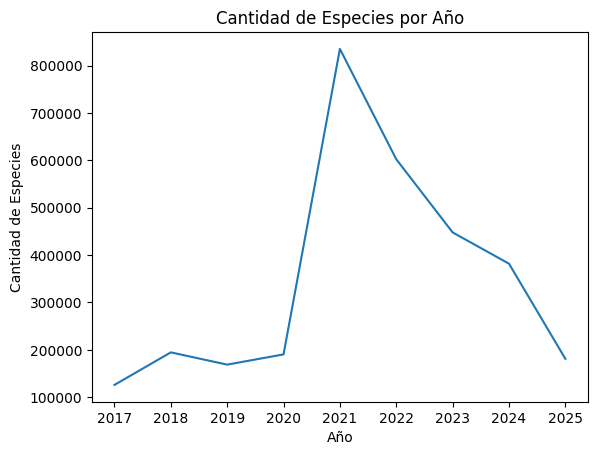

In [16]:
plt.plot(tabla_Convertida['Año'],tabla_Convertida['Cantidad de Especies'])
plt.title('Cantidad de Especies por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Especies')
plt.show()

In [17]:
tabla_Convertida.to_excel('Cantidad de Especies Producidas Por Año.xlsx',index=False)